## **Kelompok 4**

In [ ]:
import numpy as np
import tensorflow as tf
import keras,os
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Input, UpSampling2D, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.zip to dataset1.zip


In [ ]:
!unzip dataset1.zip

Archive:  dataset1.zip
  inflating: prediction/prediction/ba17.png  
  inflating: prediction/prediction/ba49.mine2.png  
  inflating: prediction/prediction/ca2.png  
  inflating: prediction/prediction/da5.png  
  inflating: prediction/prediction/dha11.png  
  inflating: prediction/prediction/ga16.png  
  inflating: prediction/prediction/ha0.png  
  inflating: prediction/prediction/ja12.png  
  inflating: prediction/prediction/ka4.png  
  inflating: prediction/prediction/la9.png  
  inflating: prediction/prediction/ma.0.jpg  
  inflating: prediction/prediction/ma.1.jpg  
  inflating: prediction/prediction/ma15.png  
  inflating: prediction/prediction/na1.png  
  inflating: prediction/prediction/nga19.png  
  inflating: prediction/prediction/nga220.pred.png  
  inflating: prediction/prediction/nya14.png  
  inflating: prediction/prediction/pa10.png  
  inflating: prediction/prediction/ra164.pred.png  
  inflating: prediction/prediction/ra3.png  
  inflating: prediction/prediction/sa7.png

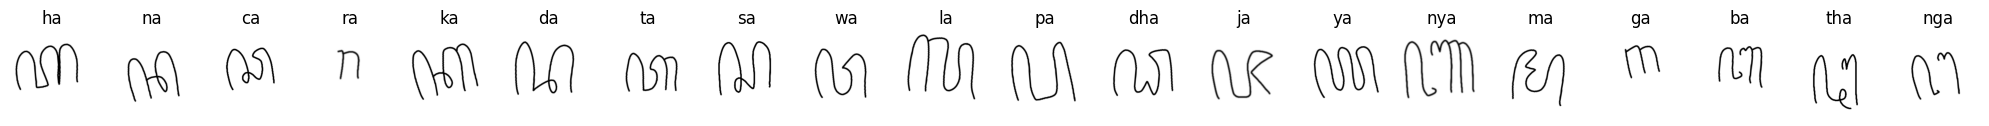

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_train_images(data_dir, labels):
    num_classes = len(labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(20, 5))  # Adjust figsize for better visualization
    axes = axes.flatten()

    for idx, class_name in enumerate(labels):
        image_dir = os.path.join(data_dir, class_name)
        # Handle the case where the directory might be empty
        if os.listdir(image_dir):
            image_path = os.path.join(image_dir, os.listdir(image_dir)[0]) # Access the first image if available
            image = plt.imread(image_path)

            axes[idx].imshow(image)
            axes[idx].set_title(class_name)
            axes[idx].axis('off')
        else:
            axes[idx].axis('off')
            axes[idx].set_title(f"{class_name}\n(Empty)")

    plt.tight_layout()
    plt.show()

# Convert the dictionary to a list of class names
labels = {'ha': 0, 'na': 1, 'ca': 2, 'ra': 3, 'ka': 4, 'da': 5, 'ta': 6, 'sa': 7, 'wa': 8, 'la': 9, 'pa': 10, 'dha': 11, 'ja': 12, 'ya': 13, 'nya': 14, 'ma': 15, 'ga': 16, 'ba': 17, 'tha': 18, 'nga': 19}
class_names = list(labels.keys())
train_dir = '/content/v3/v3/train'  # Update this path as per your directory structure
plot_train_images(train_dir, class_names)

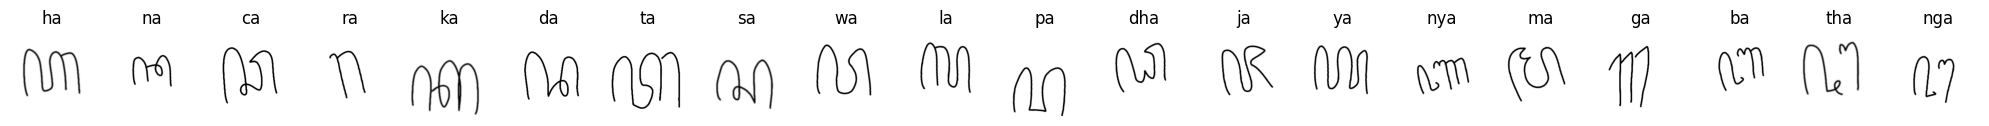

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_train_images(data_dir, labels):
    num_classes = len(labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(20, 5))  # Adjust figsize for better visualization
    axes = axes.flatten()

    for idx, class_name in enumerate(labels):
        image_dir = os.path.join(data_dir, class_name)
        # Handle the case where the directory might be empty
        if os.listdir(image_dir):
            image_path = os.path.join(image_dir, os.listdir(image_dir)[0]) # Access the first image if available
            image = plt.imread(image_path)

            axes[idx].imshow(image)
            axes[idx].set_title(class_name)
            axes[idx].axis('off')
        else:
            axes[idx].axis('off')
            axes[idx].set_title(f"{class_name}\n(Empty)")

    plt.tight_layout()
    plt.show()

# Convert the dictionary to a list of class names
labels = {'ha': 0, 'na': 1, 'ca': 2, 'ra': 3, 'ka': 4, 'da': 5, 'ta': 6, 'sa': 7, 'wa': 8, 'la': 9, 'pa': 10, 'dha': 11, 'ja': 12, 'ya': 13, 'nya': 14, 'ma': 15, 'ga': 16, 'ba': 17, 'tha': 18, 'nga': 19}
class_names = list(labels.keys())
train_dir = '/content/v3/v3/val'  # Update this path as per your directory structure
plot_train_images(train_dir, class_names)

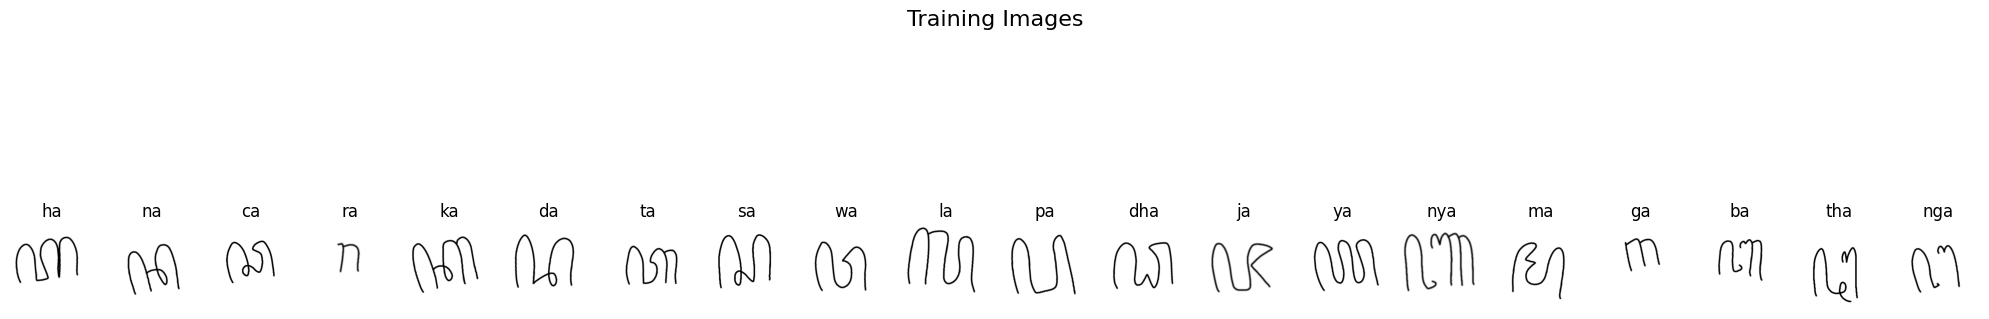

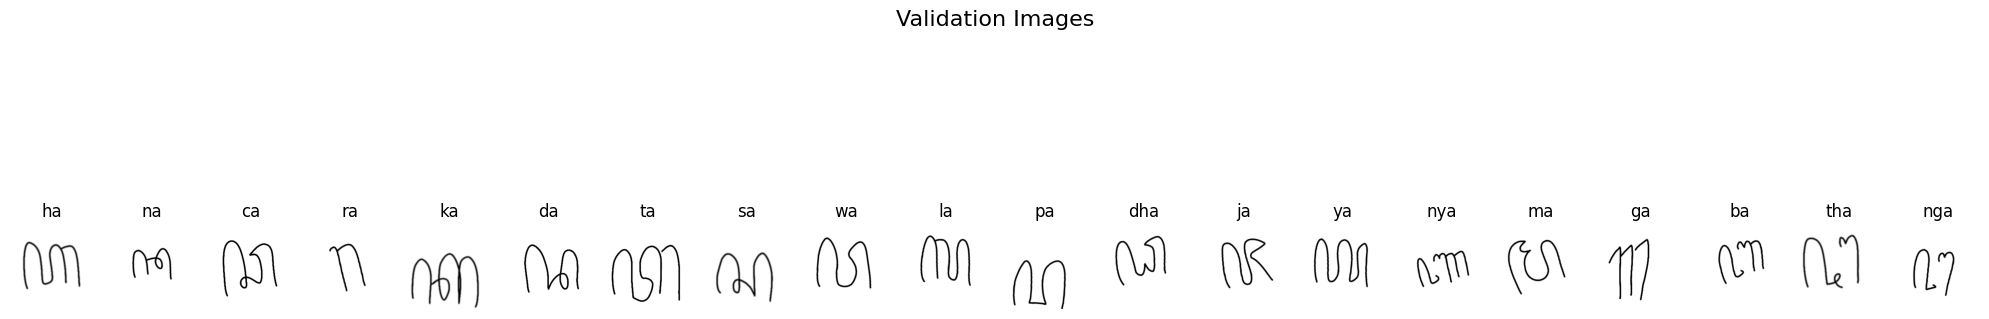

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_valid_images(data_dir, labels, title):
    num_classes = len(labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(20, 5))  # Adjust figsize for better visualization
    axes = axes.flatten()

    for idx, class_name in enumerate(labels):
        image_dir = os.path.join(data_dir, class_name)
        # Handle the case where the directory might be empty
        if os.listdir(image_dir):
            image_path = os.path.join(image_dir, os.listdir(image_dir)[0]) # Access the first image if available
            image = plt.imread(image_path)

            axes[idx].imshow(image)
            axes[idx].set_title(class_name)
            axes[idx].axis('off')
        else:
            axes[idx].axis('off')
            axes[idx].set_title(f"{class_name}\n(Empty)")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Convert the dictionary to a list of class names
labels = {'ha': 0, 'na': 1, 'ca': 2, 'ra': 3, 'ka': 4, 'da': 5, 'ta': 6, 'sa': 7, 'wa': 8, 'la': 9, 'pa': 10, 'dha': 11, 'ja': 12, 'ya': 13, 'nya': 14, 'ma': 15, 'ga': 16, 'ba': 17, 'tha': 18, 'nga': 19}
class_names = list(labels.keys())
train_dir = '/content/v3/v3/train'  # Update this path as per your directory structure
validation_dir = '/content/v3/v3/val'  # Update this path as per your directory structure

# Plot train images
plot_valid_images(train_dir, class_names, 'Training Images')

# Plot validation images
plot_valid_images(validation_dir, class_names, 'Validation Images')

In [ ]:
# Folder tempat gambar diekstrak
train_dir = '/content/v3/v3/train'
valid_dir = '/content/v3/v3/val'
test_dir = '/content/prediction'

In [ ]:
# Generator data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator data validasi
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
# Generator data training dan validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Sesuaikan dengan input_shape dari model
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),  # Sesuaikan dengan input_shape dari model
    batch_size=32,
    class_mode='categorical'
)

# Generator data uji
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Sesuaikan dengan input_shape dari model
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Jangan acak untuk evaluasi
)

# # Add error handling to identify problematic files
# for i in range(len(train_generator.filenames)):
#     try:
#         img = tf.keras.preprocessing.image.load_img(train_generator.filepaths[i])
#     except Exception as e:
#         print(f"Error loading image: {train_generator.filepaths[i]} - {e}")

# for i in range(len(validation_generator.filenames)):
#     try:
#         img = tf.keras.preprocessing.image.load_img(validation_generator.filepaths[i])
#     except Exception as e:
#         print(f"Error loading image: {validation_generator.filepaths[i]} - {e}")

Found 2154 images belonging to 20 classes.
Found 480 images belonging to 20 classes.
Found 25 images belonging to 1 classes.


In [ ]:
labels = train_generator.class_indices
print(labels)

{'ba': 0, 'ca': 1, 'da': 2, 'dha': 3, 'ga': 4, 'ha': 5, 'ja': 6, 'ka': 7, 'la': 8, 'ma': 9, 'na': 10, 'nga': 11, 'nya': 12, 'pa': 13, 'ra': 14, 'sa': 15, 'ta': 16, 'tha': 17, 'wa': 18, 'ya': 19}


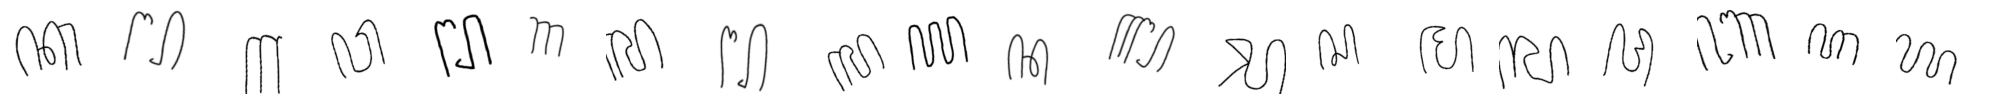

In [ ]:
def plot_gambar_augmentasi(generator):
    x_batch, y_batch = next(generator)

    fig, axes = plt.subplots(1, 20, figsize=(20, 20))
    axes = axes.flatten()

    for img, ax in zip(x_batch, axes):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_gambar_augmentasi(train_generator)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97):
            print("\nAkurasi di atas 97%")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 3 channels for RGB images
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='softmax')  # Number of classes
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
from keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:

# from keras.callbacks import EarlyStopping

# # Mendefinisikan objek callback EarlyStopping
# callbacks = EarlyStopping(monitor='val_loss', patience=5)

# Melatih model dengan menggunakan generator
history = model.fit(
    train_generator,                   # Generator data pelatihan
    epochs=50,                        # Jumlah epoch
    validation_data=validation_generator,  # Generator data validasi
    verbose=2,                         # Tingkat kecerewetan output (0, 1, atau 2)
    # callbacks=[callbacks]  # Daftar callbacks yang ingin digunakan
)

Epoch 1/50
68/68 - 142s - loss: 0.5424 - accuracy: 0.8073 - val_loss: 0.3210 - val_accuracy: 0.9042 - 142s/epoch - 2s/step
Epoch 2/50
68/68 - 139s - loss: 0.5408 - accuracy: 0.7934 - val_loss: 0.3538 - val_accuracy: 0.8833 - 139s/epoch - 2s/step
Epoch 3/50
68/68 - 132s - loss: 0.4882 - accuracy: 0.8189 - val_loss: 0.3177 - val_accuracy: 0.8938 - 132s/epoch - 2s/step
Epoch 4/50
68/68 - 136s - loss: 0.5213 - accuracy: 0.8050 - val_loss: 0.3328 - val_accuracy: 0.8792 - 136s/epoch - 2s/step
Epoch 5/50
68/68 - 134s - loss: 0.4793 - accuracy: 0.8194 - val_loss: 0.3171 - val_accuracy: 0.9021 - 134s/epoch - 2s/step
Epoch 6/50
68/68 - 135s - loss: 0.4972 - accuracy: 0.8138 - val_loss: 0.3395 - val_accuracy: 0.8875 - 135s/epoch - 2s/step
Epoch 7/50
68/68 - 132s - loss: 0.4766 - accuracy: 0.8254 - val_loss: 0.3279 - val_accuracy: 0.8979 - 132s/epoch - 2s/step
Epoch 8/50
68/68 - 137s - loss: 0.4402 - accuracy: 0.8412 - val_loss: 0.3271 - val_accuracy: 0.9062 - 137s/epoch - 2s/step
Epoch 9/50
68/68

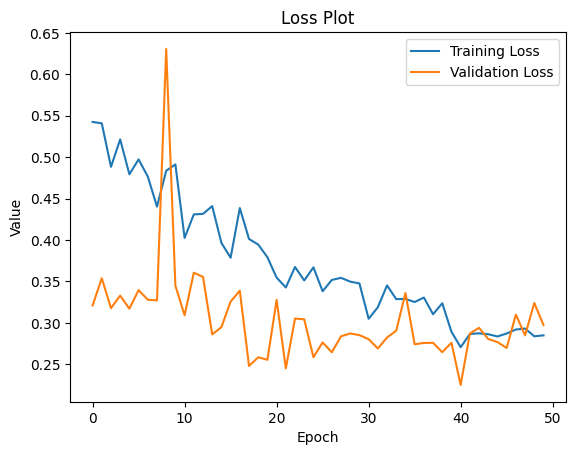

In [ ]:
from matplotlib import pyplot as plt #loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

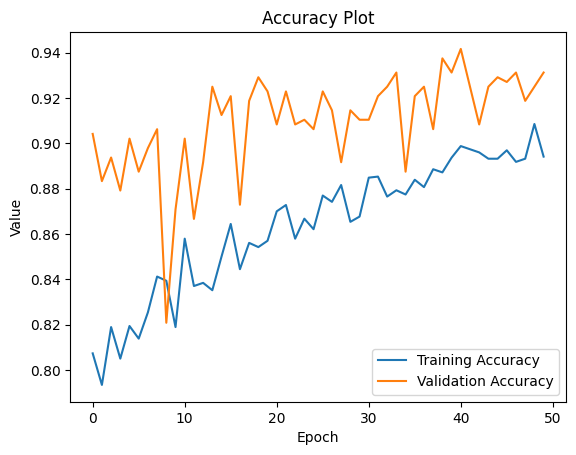

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 1s 820ms/step - loss: 421.2436 - accuracy: 0.0800
Test accuracy: 0.0800


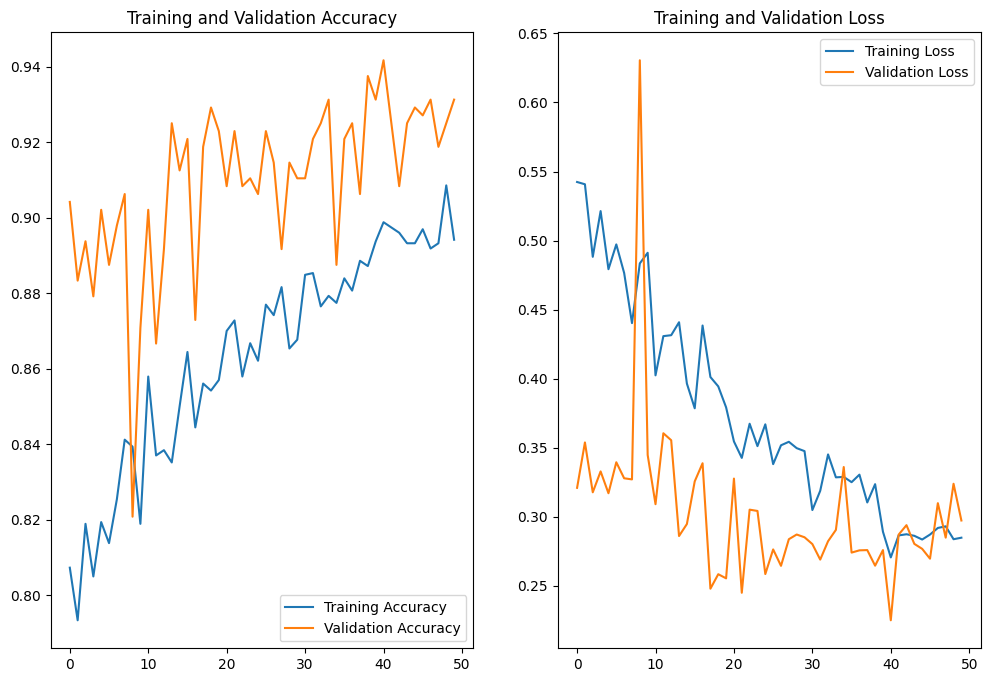

In [ ]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()